In [1]:
import datetime
import os
from mdagent import MDAgent
import matplotlib.pyplot as plt

In [2]:
prompt24 = "Analyze the rdf of the simulation of 1A3N solvated in water"
llm_var = "gpt-4-1106-preview"
tools = "all"
agent = MDAgent(agent_type="Structured", model=llm_var, top_k_tools=tools)
now = datetime.datetime.now()
date = now.strftime("%Y-%m-%d")
print("date and time:",date)
time = now.strftime("%H:%M:%S")
print("time:",time)
print("LLM: ",agent.llm.model_name,"\nTemperature: ",agent.llm.temperature)

date and time: 2024-07-21
time: 13:16:27
LLM:  gpt-4-1106-preview 
Temperature:  0.1


In [3]:
agent.run(prompt24)

Thought: To analyze the radial distribution function (RDF) of the simulation of the protein 1A3N solvated in water, I need to use the RDFTool. However, before I can do that, I need to ensure that the trajectory file and the topology file for the simulation are available. I will use the ListRegistryPaths tool to check for the available files in the registry.

Action:
```
{
  "action": "ListRegistryPaths",
  "action_input": {
    "paths": "paths"
  }
}
```

Since there are no names found in the registry, it means that the trajectory and topology files for the protein 1A3N solvated in water are not available in the registry. To proceed with the RDF analysis, I need to obtain these files. The PDB ID 1A3N refers to a protein structure, but I need the simulation trajectory data, which is not typically available from PDB. If the simulation was previously run and the data was supposed to be available, there might be an issue with the registry or the data might not have been saved correctly.

H

2024-07-21 13:16:54.408 
  command:

    streamlit run /opt/anaconda3/envs/mdagent/lib/python3.11/site-packages/ipykernel_launcher.py [ARGUMENTS]


Now that I have the PDB file ID for 1A3N, I can proceed to set up and run the simulation with the protein solvated in water. I will use the SetUpandRunFunction tool again, this time with the correct file ID for the PDB file.

Action:
```
{
  "action": "SetUpandRunFunction",
  "action_input": {
    "pdb_id": "1A3N_131654",
    "forcefield_files": ["amber99sb.xml", "tip3p.xml"],
    "save": true,
    "system_params": {
      "nonbondedMethod": "PME",
      "nonbondedCutoff": "1 * nanometers",
      "constraints": "HBonds",
      "rigidWater": true,
      "constraintTolerance": 0.00001,
      "solvate": true
    },
    "integrator_params": {
      "integrator_type": "LangevinMiddle",
      "Temperature": "300 * kelvin",
      "Friction": "1.0 / picoseconds",
      "Timestep": "0.002 * picoseconds"
    },
    "simulation_params": {
      "Ensemble": "NVT",
      "Number of Steps": 5000,
      "record_interval_steps": 100,
      "record_params": ["step", "potentialEnergy", "temperature"]
  

('Final Answer: The radial distribution function (RDF) analysis of the protein 1A3N solvated in water has been successfully completed. The RDF plot can be found with the ID fig0_132739. This plot will show the distribution of water molecules around the protein over the course of the simulation, providing insight into the solvation structure and the interactions between the protein and the solvent.',
 'LRPPLIYS')

In [4]:
now = datetime.datetime.now()
date = now.strftime("%Y-%m-%d")
print("date and time:",date)
time = now.strftime("%H:%M:%S")
print("time:",time)
registry = agent.path_registry
paths_and_descriptions = registry.list_path_names_and_descriptions()
print("\n".join(paths_and_descriptions.split(",")))

date and time: 2024-07-21
time: 13:27:49
Files found in registry: 1A3N_131654: PDB file downloaded from RSCB
 PDBFile ID: 1A3N_131654
 1A3N_131725: Cleaned File:  Removed Heterogens
 and Water Removed.  Replaced Nonstandard Residues. Added Hydrogens at pH 7.0. Missing Atoms Added and replaces nonstandard residues. 
 top_sim0_131736: Initial positions for simulation sim0_131736
 sim0_131736: Basic Simulation of Protein 1A3N_131725
 rec0_131742: Simulation trajectory for protein 1A3N_131725 and simulation sim0_131736
 rec1_131742: Simulation state log for protein 1A3N_131725 and simulation sim0_131736
 rec2_131742: Simulation pdb frames for protein 1A3N_131725 and simulation sim0_131736
 fig0_132739: RDF plot for the trajectory file with id: rec0_131742


In [21]:
traj_fileid = "rec0_131742"
top_fileid = "top_sim0_131736"

path_traj = registry.get_mapped_path(traj_fileid)
path_top = registry.get_mapped_path(top_fileid)
assert os.path.exists(path_traj)
assert os.path.exists(path_top)
assert path_traj != path_top

assert path_traj.endswith(".dcd")
assert path_top.endswith(".pdb")

In [7]:
import mdtraj as md
traj = md.load(path_traj, top=path_top)
print(f"Simulation with :{traj.n_atoms} for {traj.n_frames} frames. Total time: {traj.time[-1]*0.002} ps")

Simulation with :23813 for 60 frames. Total time: 0.11800000000000001 ps


In [ ]:
rdf_path = registry.get_mapped_path("fig0_132739")
#Disclaimer: Theres a bug in the rdf path saving. The image was created correctly, but the path was not saved correctly.

# from IPython.display import Image
# Image(filename=rdf_path)

In [30]:
assert os.path.exists(rdf_path), "The path for this figure either doesn't exist or is incorrect"

AssertionError: The path for this figure either doesn't exist or is incorrect

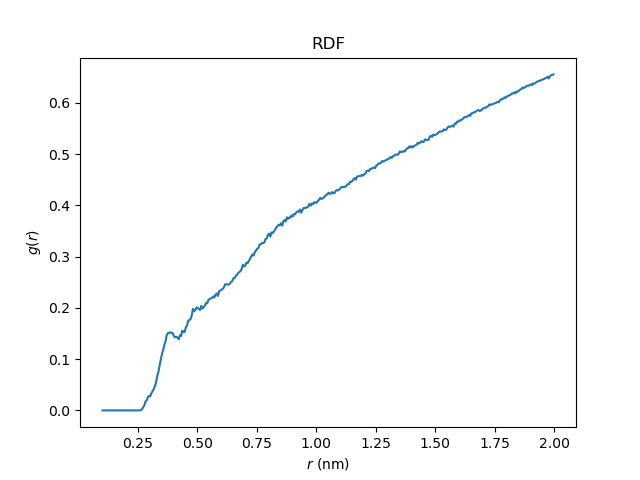

In [31]:
rdf_path = registry.get_mapped_path("fig0_132739")
correct_rdf_path = agent.path_registry.ckpt_figures + "/rdf_" + traj_fileid + ".png"
assert os.path.exists(correct_rdf_path)

from IPython.display import Image
Image(filename=correct_rdf_path)

# Experiment Result:
### Completed without Exception or TimeOut Errors ✅
### Attempted all necessary steps ✅
### Completed with Hallucination ✅
### Logic make sense ✅
### Correct Answer ✅